# Accessing Databases via Web APIs
* * * * *

In [ ]:
# Import required libraries
from __future__ import division
import requests
import json
import math
import csv
import matplotlib.pyplot as plt

## 1. Constructing an API GET Request
*****

In the first place, we know that every call will require us to provide:

1. a base URL for the API, 
2. some authorization code or key, and 
3. a format for the response. 

Since we need to reference these three pieces of informationn, let's create variables to represent them.

--

Use the following demonstration keys for now, but in the future, get your own!

1. q9gEI9x50x7Bta6N76frd0xNpxSURGQG
2. 0iba51sItdaP00kYDe02jqNwWnhhFKA0
3. q9gEI9x50x7Bta6N76frd0xNpxSURGQG
4. ANQm8PJwuVMgLb4y8yulbhqr1i3xGL7z
5. z0SVua5KEYBxYGVXS4OqeLJWrH8BRP5O
6. Mn4xGQCuGDsfaNqHaKb3VINHNcrCLMUJ
7. yYB9cNbPuR0Z0QmPLroKfLFoLY3KmjQj
7. V8Xa3CrnMkMe2mD983mGxLXA3zxbAynY
7. cudsugKIoQRdl8WYFgVSnleOIaneC1Rf
8. IWeBOQJjTAq4uOzgK2G3qEp1i03kEAij
5. ac70YDfNM0Hn7ZuQKbK4tDCjrUKSixLU

In this case, we want the format of the responses (or output) to be in **JSON** format (which stands for **JavaScript Object Notation**). 

**JSON** is a common data format that stores sets of values using braces and brackets. As in the example image below, the the JSON data format allows us nest data by certain hierarchies.

In the following example, we can create an entry called 'firstName' and assign the value 'John' to it, separated by a `:`.

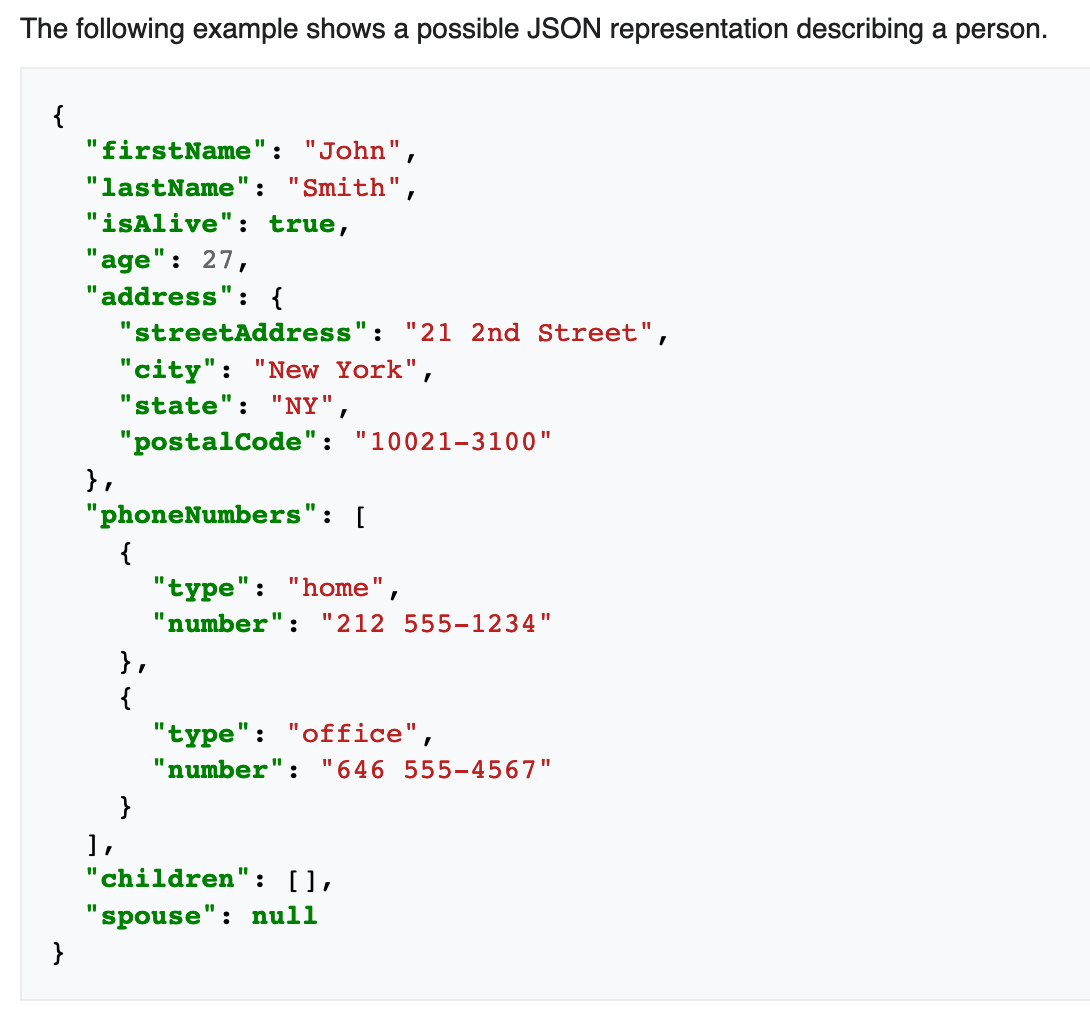

Photo: [Wikipedia](https://en.wikipedia.org/wiki/JSON)

In [ ]:
# set key
key="JbPRNv59Mp7GKwRdAVDJcvWHghWQX6G7"

# set base url
base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

# set response format
response_format=".json"

When accessing APIs, we often want to send some sort of data, which we can specify in the URL query string. This data tells the API what information we want. In our case, we want articles about Duke Ellington. The Requests library allows you to provide these arguments as a dictionary, using the `params` keyword argument. In addition to the search term `q`, we have to put in the `api-key` term.

Below, we are providing the API with our search term and our API key.

In [ ]:
# set search parameters
search_params = {"q":"Duke Ellington",
                 "api-key":key}

Here, the search term is represented by the letter "q". Recall that we use the variable "key" (which we created above) to represent the API key.

Now we're ready to make the request. We use the `.get` method from the `requests` library to make an HTTP GET Request.

Before we make the request, recall that we we have defined the variables in this request:

In [ ]:
# make request
r = requests.get(base_url+response_format, params=search_params)

Now, we have a [response](http://docs.python-requests.org/en/latest/api/#requests.Response) object called `r`. We can get all the information we need from this object. For instance, we can see that the URL has been correctly encoded by printing the URL. Click on the link to see what happens.

Below, we can use the Python `print` function to show the URL for the response.

In [ ]:
print(r.url)

Click on that link to see it returns!

### Challenge 1:  Adding a date range

What if we only want to search within a particular date range? The NYT Article API allows us to specify start and end dates.

Alter the `search_params` code above so that the request only searches for articles in the year 2015.

You're gonna need to look at the documentation [here](https://developer.nytimes.com/docs/articlesearch-product/1/overview) to see how to do this.

In [ ]:
# set date parameters here
search_params = {"q":"Duke Ellington",
                 "api-key":key,
                 "begin_date": "20150101",
                 "end_date": "20151231"}

In [ ]:
# Uncomment to test

r = requests.get(base_url+response_format, params=search_params)
print(r.url)

### Challenge 2:  Specifying a results page

The above will return the first 10 results. To get the next ten, you need to add a "page" parameter. Change the search parameters above to get the second 10 results. 

In [ ]:
# set page parameters here
search_params["page"] = 1

In [ ]:
# Uncomment to test
r = requests.get(base_url+response_format, params=search_params)
print(r.url)

## 2. Exploring (parsing) the response text
*****

We can read the content of the server’s response using the `.text` method. This will return the entire response in text format.

In [ ]:
# Inspect the content of the response, parsing the result as text
response_text = r.text
print(response_text[:1000])

What you see here is JSON text, encoded as unicode text. JSON stands for "Javascript object notation." It has a very similar structure to a python dictionary -- both are built on key/value pairs. This makes it easy to convert JSON response to a python dictionary.

In [ ]:
# Convert JSON response to a dictionary
data = json.loads(response_text)
data

That looks intimidating! But it's really just a big dictionary. Let's see what keys we got in there.

Remember that the variable `data` contains the API response. Let's use the data variable from above and tell Python to return the keys of the dictionary.

In [ ]:
print(data.keys())

In [ ]:
# this is boring
data['status']

In [ ]:
# so is this
data['copyright']

In [ ]:
# this is what we want!
# data['response']

We have a huge amount of text, but from there, we're looking for articles that mention "Duke Ellington". In order to look at the response key in more detail:

In [ ]:
data['response'].keys()

From the NYT API documentation, we can see that there is a key called 'hits' which indicates the number of matches for our search term, "Duke Ellington".

In [ ]:
data['response']['meta']['hits']

In [ ]:
# data['response']['docs']
type(data['response']['docs'])

That looks what we want! Let's put that in it's own variable.

In [ ]:
docs = data['response']['docs']

In [ ]:
docs[0]

## Challenge - for `docs` pull out the lead_paragraph, abstract, publication date (pub_date)

Spend five minutes exploring the response. 

In [ ]:
docs[0]['abstract']

In [ ]:
docs[0]['pub_date']

In [ ]:
docs[0]['lead_paragraph']

## 3. Putting everything together to get all the articles.
*****

That's great. But we only have 10 items. The original response said we had 93 hits! Which means we have to make 93 /10, or 10 requests to get them all. **Sounds like a job for a loop!** 

But first, let's review what we've done so far.

1. We've imported libraries.
1. We've set some variables we'll use in our API request like the **API key**, **base url**, & the **response format**
1. We can then set our **search parameters** -- these are what we'll request. 
1. We then made the request from the NYT API. 
1. And then loaded the text respond as using JSON loads which gives us a what in Python? What type of data object? 

We can use the structure of the dictionary to pull out the number of hits we got. This time we will assign to a variable called `hits`. We need this for the loop we are going to write soon.

In [ ]:
# get number of hits
hits = data['response']['meta']['hits']
print("number of hits: ", str(hits))

We then do some math to figure out how many pages we have loop through? What do you think `math.ceil` does? 

In [ ]:
# get number of pages
pages = int(math.ceil(hits/10))

Pages is the number of pages now.

In [ ]:
pages

Ok! Now we can do something new from here. We are going to create what they call the **accumulator pattern**. That means we are going to create an empty list, loop thru our results, and add the documents to the list. 

Let's make the empty list:

In [ ]:
# make an empty list where we'll hold all of our docs for every page
all_docs = [] 

Let's build the loop:

Who can tell me what the function `range()` does from last week? 

In [ ]:
#help(range)

In [ ]:
# now we're ready to loop through the pages
for page in range(pages):
    print("collecting page", str(page))
        
    # set the page parameter
    search_params['page'] = page
        
    # make request
    r = requests.get(base_url+response_format, params=search_params)
    
    # get text and convert to a dictionary
    data=json.loads(r.text)
        
    # get just the docs
    docs = data['response']['docs']
        
    # add those docs to the big list
    all_docs = all_docs + docs

We use range here b/c it gives us a sequence of integers we can loop through. `pages` itself is a number we can't loop through, so `range` will make it loopable. 

In [ ]:
len(all_docs)

In [ ]:
all_docs[3]

## But our Research Question was: How Much More or Less Popular is Duke Ellington?

Ok, think for a minute and then share in the Etherpad what you think we need to do with the NYT API to answer this question? 

Think in terms of steps you'd need to do to get this problems solved.

* get the number of hits for the last 15 years 
* store in some data object for use
* we could do this in the existing loop but it gets messy in code as we redo the loop for each year
* what we want to do is write a function that will repeat our code
* Who's familiar with functions in another language? Use the yes on your zoom.

### Functions

* Break programs down into functions to make them easier to understand.
* Human beings can only keep a few items in working memory at a time.
* Functions encapsulate complexity so that we can treat it as a single “thing”.
* Write one time, use many times.

![](https://swcarpentry.github.io/python-novice-inflammation/fig/python-function.svg)

1. Define a function using `def` with a `name`, `parameters`, and a `block of code`.
1. Begin the definition of a new function with def.
1. Followed by the name of the function.
1. Must obey the same rules as variable names.
1. Then parameters in parentheses.
1. Empty parentheses if the function doesn’t take any inputs.
1. We will discuss this in detail in a moment.
1. Then a colon.
1. Then an indented block of code.

Together let's write what the function will do and then we can fill in & tweak the code we've already written

In [ ]:
# for this challenge, we just need the number of hits.
def get_api_hits(term, year):
    '''
    returns an integer, the number of hits (or articles) mentioning the given term
    in the given year
    '''
    # set base url
    # set response format
    # set search parameters
    # make request
    # convert to a dictionary
    # get number of hits
    return(hits)

Cool things about this function is we've written the needed code already.

1. Let's grab the base url from above
2. We set the reponse format too
3. Set the search paramas - here we need to use the year & term passed in from the argument
4. Make request code can be copied
5. WE convert to a dictionary 
6. We grab the total number of hits that year has
7. return those hits

In [ ]:
# for this challenge, we just need the number of hits.
def get_api_hits(term, year):
    '''
    returns an integer, the number of hits (or articles) mentioning the given term
    in the given year
    '''
    # set base url
    base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

    # set response format
    response_format=".json"

    # set search parameters
    search_params = {"q":term,
                 "api-key":key,
                 "begin_date": str(year) + "0101", # date must be in YYYYMMDD format
                 "end_date":str(year) + "1231"}

    # make request
    r = requests.get(base_url+response_format, params=search_params)
    
    # convert to a dictionary
    data=json.loads(r.text)
    
    # get number of hits
    hits = data['response']['meta']['hits']
    return(hits)

We can test it for 1 year to see if it works! 

In [ ]:
# uncomment to test
# get_api_data("Duke Ellington", 2014)

But how about all 15 years? How would we accomplish that? 

Yes! we need to write a loop and store the results of the hits for reuse.

In [ ]:
# collect data
years = range(2010, 2015)
years

all_duke = []
for year in years:
    all_duke.append(get_api_hits("Duke Ellington", year))

Finally, we should show this off! 

In [ ]:
%matplotlib inline
plt.plot(years, all_duke)
plt.axis([2010, 2015, 0, 200])

# Extra Challenges 

## Create a function to gather all documents

Fill in the blanks below to complete the function. Look at the previous code for clues. Once you fix the missing blanks, run the funtion with different terms and year (see the code cell below the loop. Start with Duke Ellington then try Nina Simone or another well known person.

In [ ]:
# DEFINE YOUR FUNCTION HERE

def get_api_data(___, ___):
    # set base url
    base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

    # set response format
    response_format=".json"

    # set search parameters
    search_params = {"q":term,
                 "api-key":key,
                 "begin_date": str(year) + "0101", # date must be in YYYYMMDD format
                 "end_date":str(year) + "1231"}

    # make request
    r = requests.get(base_url+response_format, params=search_params)
    
    # convert to a dictionary
    data=json.loads(r.text)
    
    # get number of hits
    hits = data['response']['meta']['hits']
    print("number of hits:", str(hits))
    
    # get number of pages
    pages = int(___.____(hits/10))
    
    # make an empty list where we'll hold all of our docs for every page
    all_docs = [] 
    
    # now we're ready to loop through the pages
    for page in range(pages):
        print("collecting page", str(____))
        
        # set the page parameter
        search_params['page'] = page
        
        # make request
        r = _______.get(base_url+response_format, params=search_params)
    
        # get text and convert to a dictionary
        data=json.loads(r.____)
        
        # get just the docs
        docs = data['_____']['docs']
        
        # add those docs to the big list
        all_docs = all_docs + ____
        
    return(all_docs)

In [ ]:
all_docs = get_api_data("Duke Ellington", 2015)

## Formatting & Extracting More Data
*****

Let's take another look at one of these documents.

In [ ]:
all_docs[0]

* This is all great, but it's pretty messy. What we’d really like to to have, eventually, is a **CSV**, with each row representing an article, and each column representing something about that article (header, date, etc). 
* The best way to do this is to make a lsit of dictionaries, with each dictionary representing an article and each list representing a field of metadata from that article (e.g. headline, date, etc.) 
* We can do this with a custom function:

In [ ]:
def format_articles(unformatted_docs):
    '''
    This function takes in a list of documents returned by the NYT api 
    and parses the documents into a list of dictionaries, 
    with 'id', 'header', and 'date' keys
    '''
    formatted = []
    for doc in unformatted_docs:
        dic = {}
        dic['id'] = doc['_id']
        dic['headline'] = doc['headline']['main']
        dic['date'] = doc['pub_date'][0:10] # cutting time of day.
        formatted.append(dic)
    return(formatted) 

### Challenge: Collect more fields

Edit the function above so that we include the `lead_paragraph` and `word_count` fields.

**HINT**: Some articles may not contain a lead_paragraph, in which case, it'll throw an error if you try to address this value (which doesn't exist.) You need to add a conditional statement that takes this into consideraiton. If


In [ ]:
def format_articles(unformatted_docs):
    '''
    This function takes in a list of documents returned by the NYT api 
    and parses the documents into a list of dictionaries, 
    with 'id', 'header', 'date', 'lead paragrph' and 'word count' keys
    '''
    formatted = []
    for doc in unformatted_docs:
        dic = {}
        dic['id'] = doc['_id']
        dic['headline'] = doc['headline']['main']
        dic['date'] = doc['pub_date'][0:10] # shortening time of day.
        if doc['_________']: #if it exists it will execute code below
            dic['lead_paragraph'] = doc[_______]
        dic['_________'] = doc['word_count']
        dic['keywords'] = [keyword['value'] for keyword in doc['keywords']] #this is a list comprehension
        formatted.append(dic)        
    return(formatted) 

In [ ]:
all_formatted = format_articles(all_docs)

In [ ]:
all_formatted[:5]

## Exporting
*****

We can now export the data to a CSV. Saving our work! 

In [ ]:
keys = all_formatted[1]
# writing the rest
with open('all-formated.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(all_formatted)